In [ ]:
import requests

symbol = 'AAPL'  # Example stock symbol
api_key = 'YOUR_API_KEY'  # Replace with your Alpha Vantage API key

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&outputsize=full&apikey={api_key}'
response = requests.get(url)

data = response.json()
data

{'Meta Data': {'1. Information': 'Daily Time Series with Splits and Dividend Events',
  '2. Symbol': 'AAPL',
  '3. Last Refreshed': '2023-07-13',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2023-07-13': {'1. open': '190.5',
   '2. high': '191.19',
   '3. low': '189.78',
   '4. close': '190.54',
   '5. adjusted close': '190.54',
   '6. volume': '41342338',
   '7. dividend amount': '0.0000',
   '8. split coefficient': '1.0'},
  '2023-07-12': {'1. open': '189.68',
   '2. high': '191.7',
   '3. low': '188.47',
   '4. close': '189.77',
   '5. adjusted close': '189.77',
   '6. volume': '60750248',
   '7. dividend amount': '0.0000',
   '8. split coefficient': '1.0'},
  '2023-07-11': {'1. open': '189.16',
   '2. high': '189.3',
   '3. low': '186.6',
   '4. close': '188.08',
   '5. adjusted close': '188.08',
   '6. volume': '46638119',
   '7. dividend amount': '0.0000',
   '8. split coefficient': '1.0'},
  '2023-07-10': {'1. open': '189.26',
   '2

In [ ]:
import pandas as pd

# Extract data points from the JSON response
time_series_data = data['Time Series (Daily)']
timestamps = list(time_series_data.keys())
open_prices = [float(data_point['1. open']) for data_point in time_series_data.values()]
high_prices = [float(data_point['2. high']) for data_point in time_series_data.values()]
low_prices = [float(data_point['3. low']) for data_point in time_series_data.values()]
close_prices = [float(data_point['4. close']) for data_point in time_series_data.values()]

# Create the DataFrame
df = pd.DataFrame({
    'Open': open_prices,
    'High': high_prices,
    'Low': low_prices,
    'ds': timestamps,
    'y': close_prices
})

df

,Open,High,Low,ds,y
0,190.50,191.19,189.780,2023-07-13,190.54
1,189.68,191.70,188.470,2023-07-12,189.77
2,189.16,189.30,186.600,2023-07-11,188.08
3,189.26,189.99,187.035,2023-07-10,188.61
4,191.41,192.67,190.240,2023-07-07,190.68
...,...,...,...,...,...
5957,84.62,88.37,84.000,1999-11-05,88.31
5958,82.06,85.37,80.620,1999-11-04,83.62
5959,81.62,83.25,81.000,1999-11-03,81.50
5960,78.00,81.69,77.310,1999-11-02,80.25


In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

# Assuming your preprocessed data is stored in a DataFrame called `data`
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6f2mk4v0/wj2z43q_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6f2mk4v0/pqp_bmkf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19601', 'data', 'file=/tmp/tmp6f2mk4v0/wj2z43q_.json', 'init=/tmp/tmp6f2mk4v0/pqp_bmkf.json', 'output', 'file=/tmp/tmp6f2mk4v0/prophet_model822jdvid/prophet_model-20230714172809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:28:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:28:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Python
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
6322,2024-07-08
6323,2024-07-09
6324,2024-07-10
6325,2024-07-11
6326,2024-07-12


In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
6322,2024-07-08,128.471955,41.387024,207.517024
6323,2024-07-09,128.905641,55.477106,209.215006
6324,2024-07-10,129.130238,50.048570,201.095246
6325,2024-07-11,129.939309,51.623640,201.346534
6326,2024-07-12,129.752456,52.487191,203.496714


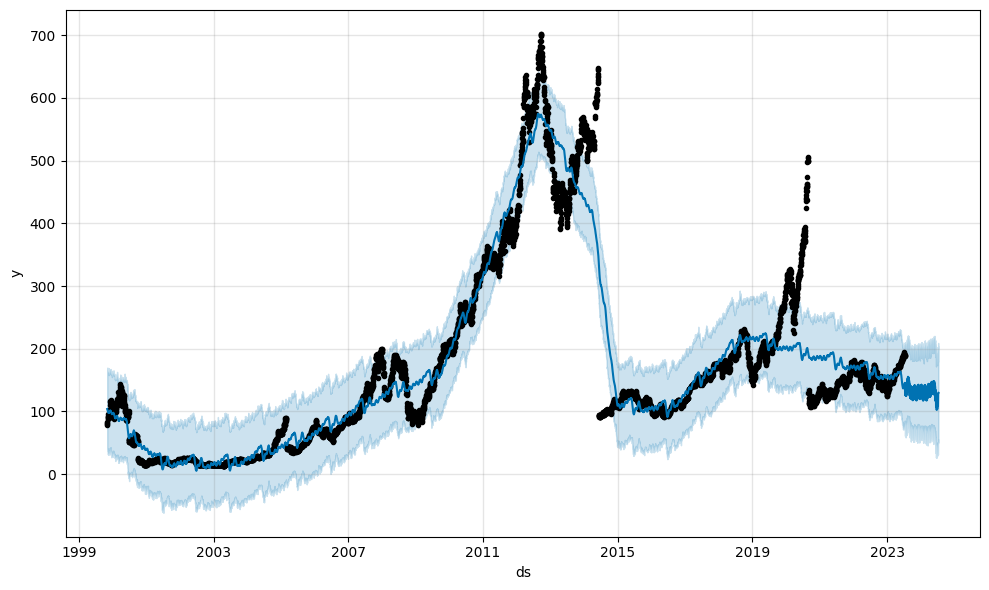

In [ ]:
fig1 = model.plot(forecast)

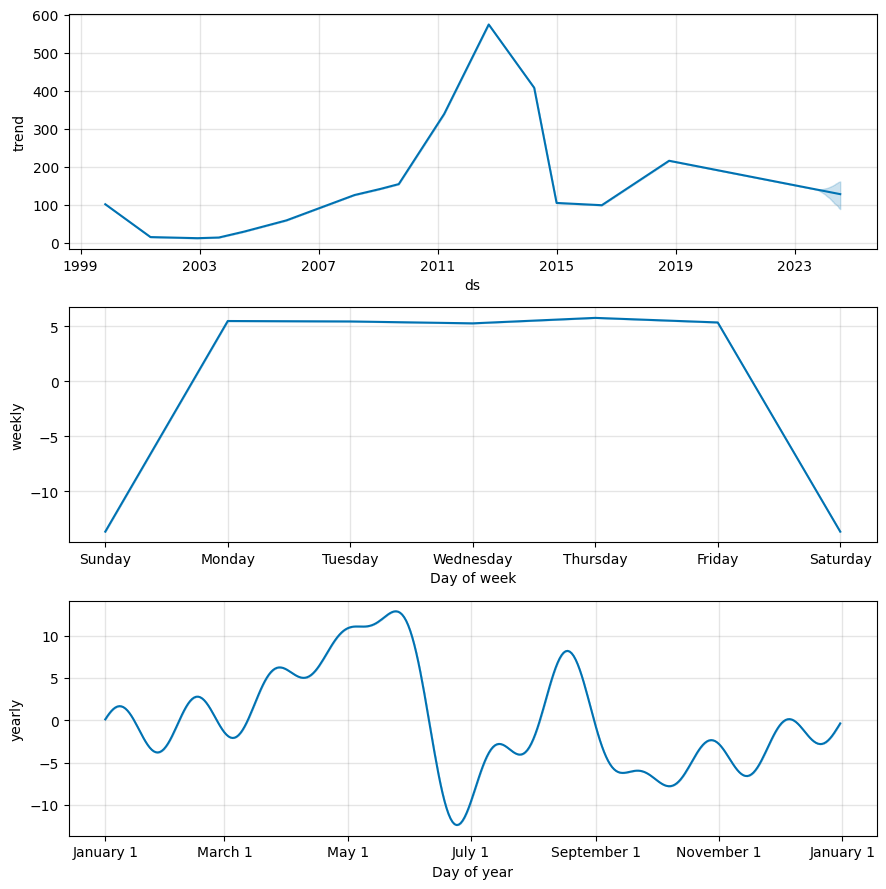

In [ ]:
fig2 = model.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [ ]:
plot_components_plotly(model, forecast)